<small>*BLU513E - Fuzzy Logic Programming*</small><br>
*Valentin L'HOMEL - 922110009*
<h2><center>Homework 2</center></h2>

### Code Initialization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy
import math

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', family='sans-serif')

In [4]:
def fuzzyGraphsText(graphs_X_Y_text):
    fig, axs = plt.subplots(len(graphs_X_Y_text), 1, figsize=(5, 5*len(graphs_X_Y_text)), sharey=True)
    if len(graphs_X_Y_text) == 1: axs = [axs]
    axs[0].set_ylim((-0.01,1.01))
    for i,(X,Y,text) in enumerate(graphs_X_Y_text):
        if isinstance(Y[0], tuple) and isinstance(Y[0][0], np.ndarray):
            for ys,label in Y:
                axs[i].plot(X, ys, label=label)
            axs[i].legend()
        else:
            axs[i].plot(X,Y)
        if isinstance(text, list):
            for j,t in enumerate(text):
                axs[i].text((len(X)-1)*1.1 if isinstance(X[0],str) else X[-1]+(X[-1]-X[0])/10, .5 + (.25*(len(text)-1)/2) - .25 * j, t, {'fontsize': 20}, horizontalalignment='left')
        else:
            axs[i].text((len(X)-1)*1.1 if isinstance(X[0],str) else X[-1]+(X[-1]-X[0])/10, 0.5, text, {'fontsize': 20}, horizontalalignment='left')

### Part $\textrm{I}$

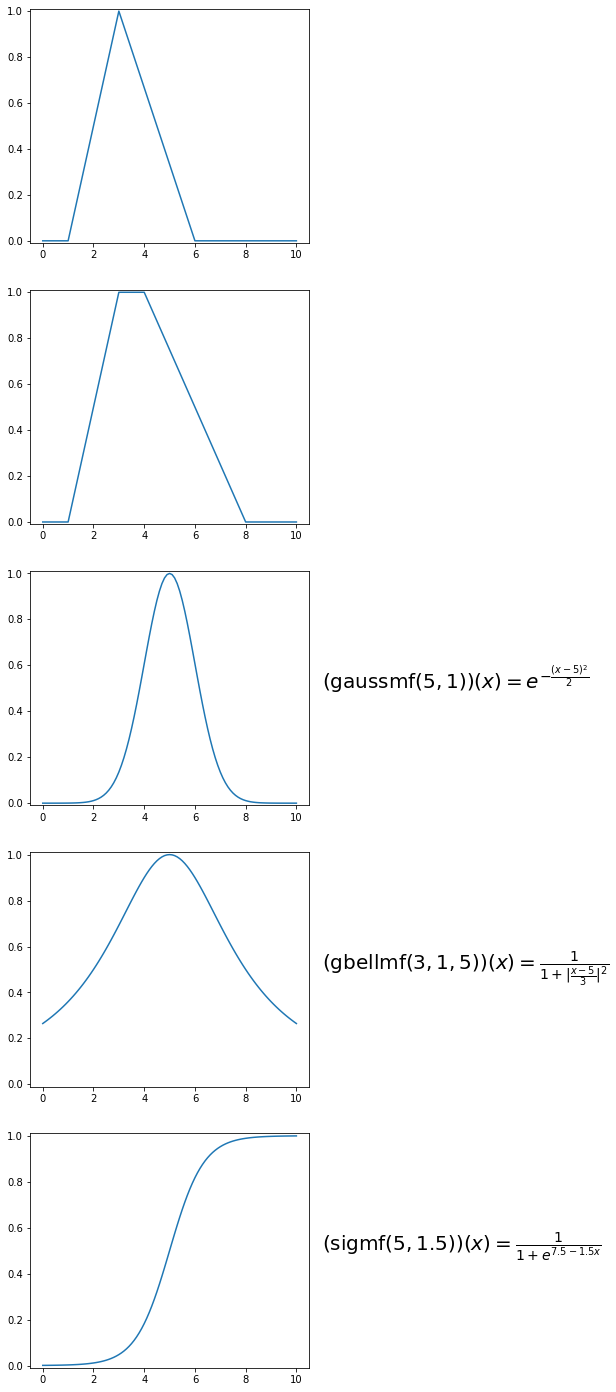

In [5]:
X = np.linspace(0,10,101)
fuzzyGraphsText([
    (X, skfuzzy.trimf(X, (1,3,6)),
        r'$ (\mathrm{trimf}(1,3,6))(x) = \begin{cases}'
        r'    \frac{x-1}{2} & x \in [1,3] \\'
        r'    \frac{6-x}{3} & x \in [3,6] \\'
        r'    0             & \text{otherwise}'
        r'\end{cases} $'),
    (X, skfuzzy.trapmf(X, (1,3,4,8)),
        r'$ (\mathrm{trapmf}(1,3,4,8))(x) = \begin{cases}'
        r'    \frac{x-1}{2} & x \in [1,3] \\'
        r'    1             & x \in [3,4] \\'
        r'    \frac{8-x}{4} & x \in [4,8] \\'
        r'    0             & \text{otherwise}'
        r'\end{cases} $'),
    (X, skfuzzy.gaussmf(X, 5, 1), r'$ (\mathrm{gaussmf}(5,1))(x) = e^{-\frac{(x-5)^2}{2}} $'),
    (X, skfuzzy.gbellmf(X, 3, 1, 5), r'$ (\mathrm{gbellmf}(3,1,5))(x) = \frac{1}{1+\left|\frac{x-5}{3}\right|^2} $'),
    (X, skfuzzy.sigmf(X, 5, 1.5), r'$ (\mathrm{sigmf}(5,1.5))(x) = \frac{1}{1+e^{7.5-1.5x}} $'),
])
plt.show()

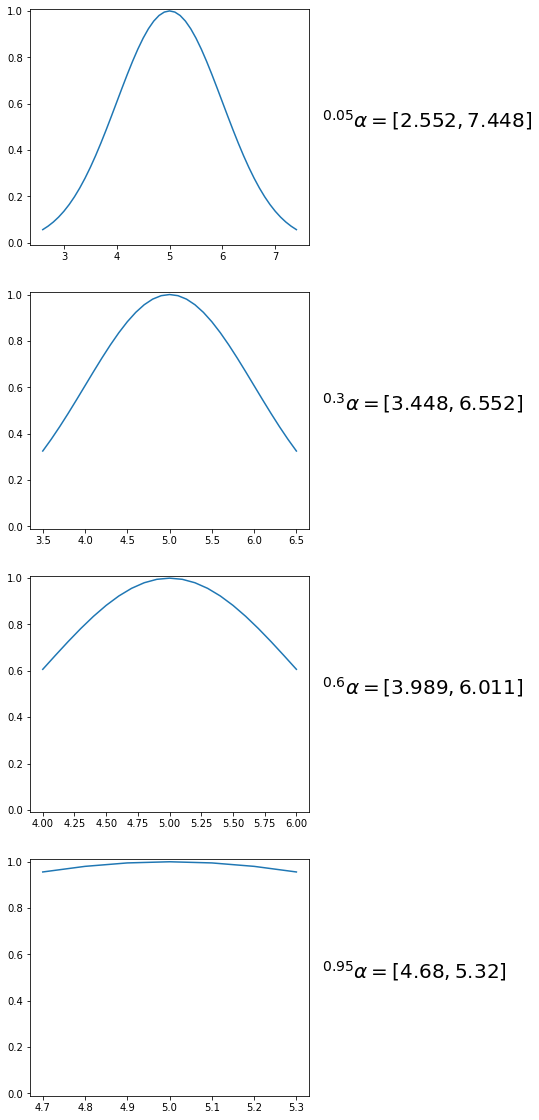

In [6]:
Y = skfuzzy.gaussmf(X, 5, 1)

# y = exp(-(x-5)^2/2)
# x = 5 +- sqrt(-2*log(y))
lowCut = lambda a: 5 - math.sqrt(-2*math.log(a))
highCut = lambda a: 5 + math.sqrt(-2*math.log(a))
cutSubset = lambda a: (X[(X >= lowCut(a)) & (X <= highCut(a))], Y[Y >= a], f"$^{{{a}}}\\alpha = [{lowCut(a):.4g},{highCut(a):.4g}]$")

fuzzyGraphsText([
    cutSubset(0.05),
    cutSubset(0.3),
    cutSubset(0.6),
    cutSubset(0.95),
])

plt.show()

### Part $\textrm{II}$

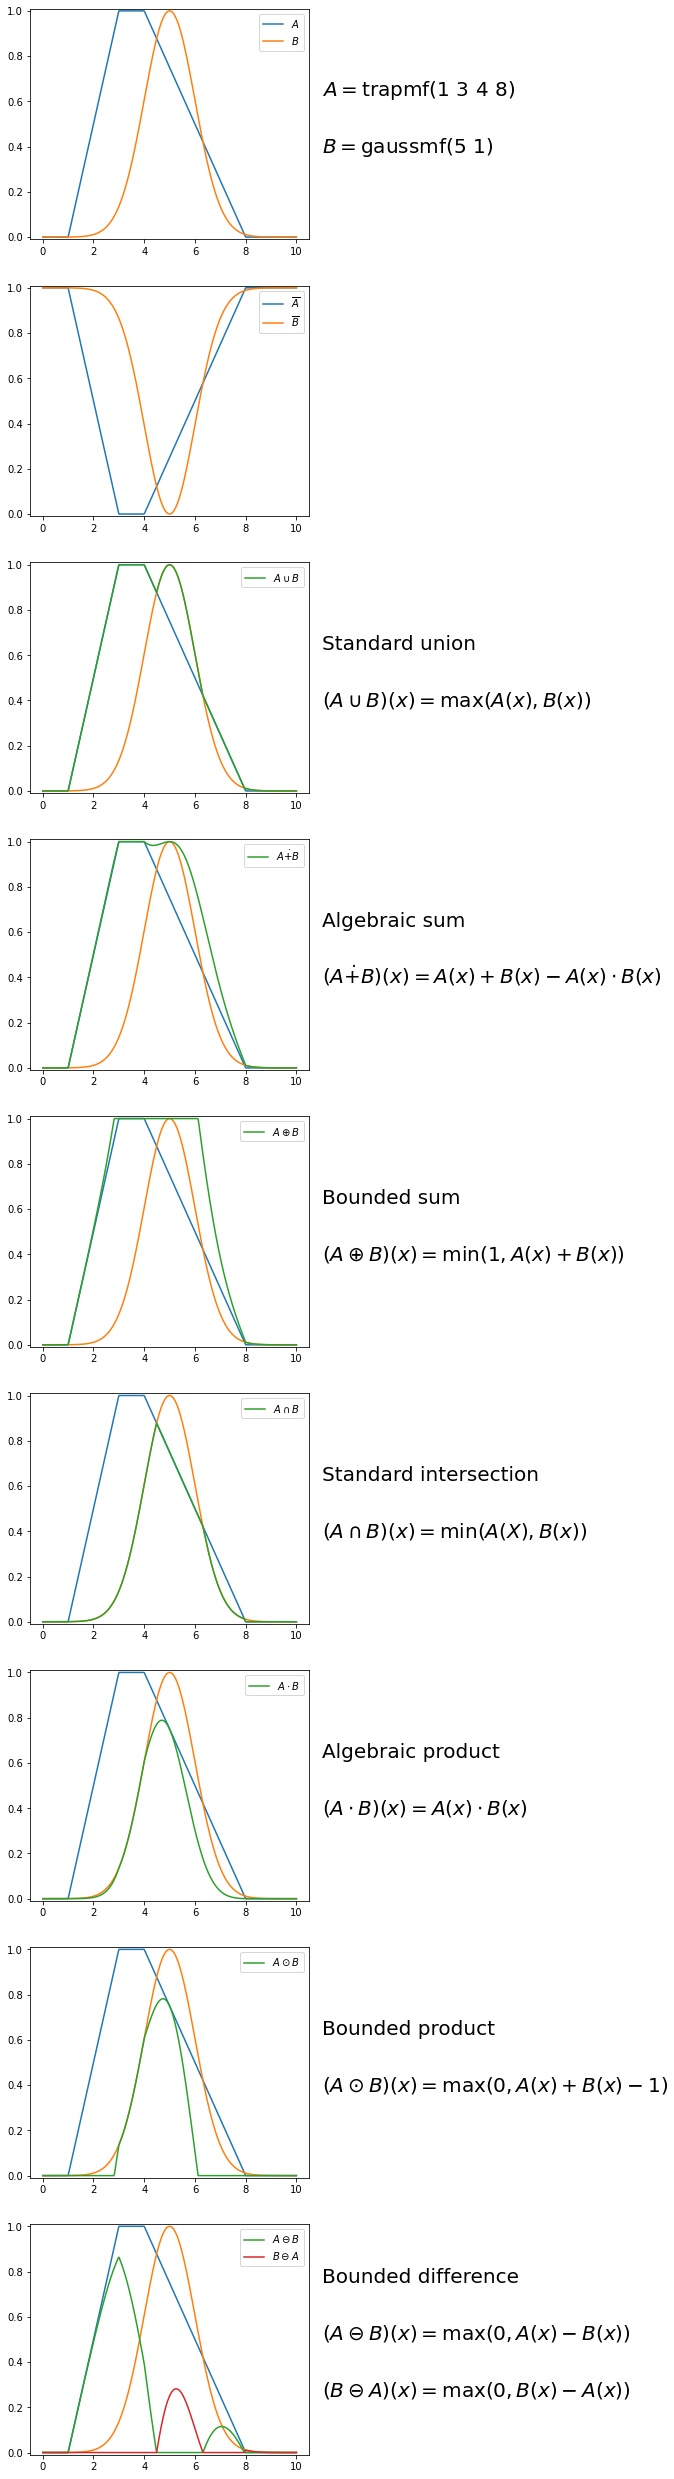

In [7]:
X = np.linspace(0,10,500)
A = skfuzzy.trapmf(X, (1,3,4,8))
B = skfuzzy.gaussmf(X, 5, 1)

Abar = skfuzzy.fuzzy_not(A)
Bbar = skfuzzy.fuzzy_not(B)
# t-norm
inters = np.fmin(A,B)
algeProd = np.multiply(A,B)
boundProd = [max(0, a+b-1) for a,b in zip(A,B)]
boundDiff = [max(0, a-b) for a,b in zip(A,B)]
boundDiff2 = [max(0, b-a) for a,b in zip(A,B)]
# s-norm
union = np.fmax(A,B)
algeSum = [a+b-a*b for a,b in zip(A,B)]
boundSum = [min(1, a+b) for a,b in zip(A,B)]

fuzzyGraphsText([
    (X, [(A,'$A$'),(B,'$B$')], [r'$A = \mathrm{trapmf}(1\ 3\ 4\ 8)$', r'$B = \mathrm{gaussmf}(5\ 1)$']),
    (X, [(Abar,r'$\overline{A}$'),(Bbar,r'$\overline{B}$')], ''),

    (X, [(A,''),(B,''), (union,r'$A \cup B$')],         ['Standard union',      r'$(A \cup B)(x) = \max(A(x),B(x))$']),
    (X, [(A,''),(B,''), (algeSum,r'$A \dot{+} B$')],    ['Algebraic sum',       r'$(A \dot{+} B)(x) = A(x)+B(x)-A(x)\cdot B(x)$']),
    (X, [(A,''),(B,''), (boundSum,r'$A \oplus B$')],    ['Bounded sum',         r'$(A \oplus B)(x) = \min(1, A(x)+B(x))$']),
    
    (X, [(A,''),(B,''), (inters,r'$A \cap B$')],        ['Standard intersection',r'$(A \cap B)(x) = \min(A(X),B(x))$']),
    (X, [(A,''),(B,''), (algeProd,r'$A \cdot B$')],     ['Algebraic product',   r'$(A \cdot B)(x) = A(x) \cdot B(x)$']),
    (X, [(A,''),(B,''), (boundProd,r'$A \odot B$')],    ['Bounded product',     r'$(A \odot B)(x) = \max(0, A(x)+B(x)-1)$']),
    (X, [(A,''),(B,''), (boundDiff,r'$A \ominus B$'),(boundDiff2,r'$B \ominus A$')],
                                                        ['Bounded difference',  r'$(A \ominus B)(x) = \max(0, A(x)-B(x))$', r'$(B \ominus A)(x) = \max(0, B(x)-A(x))$']),
])
plt.show()

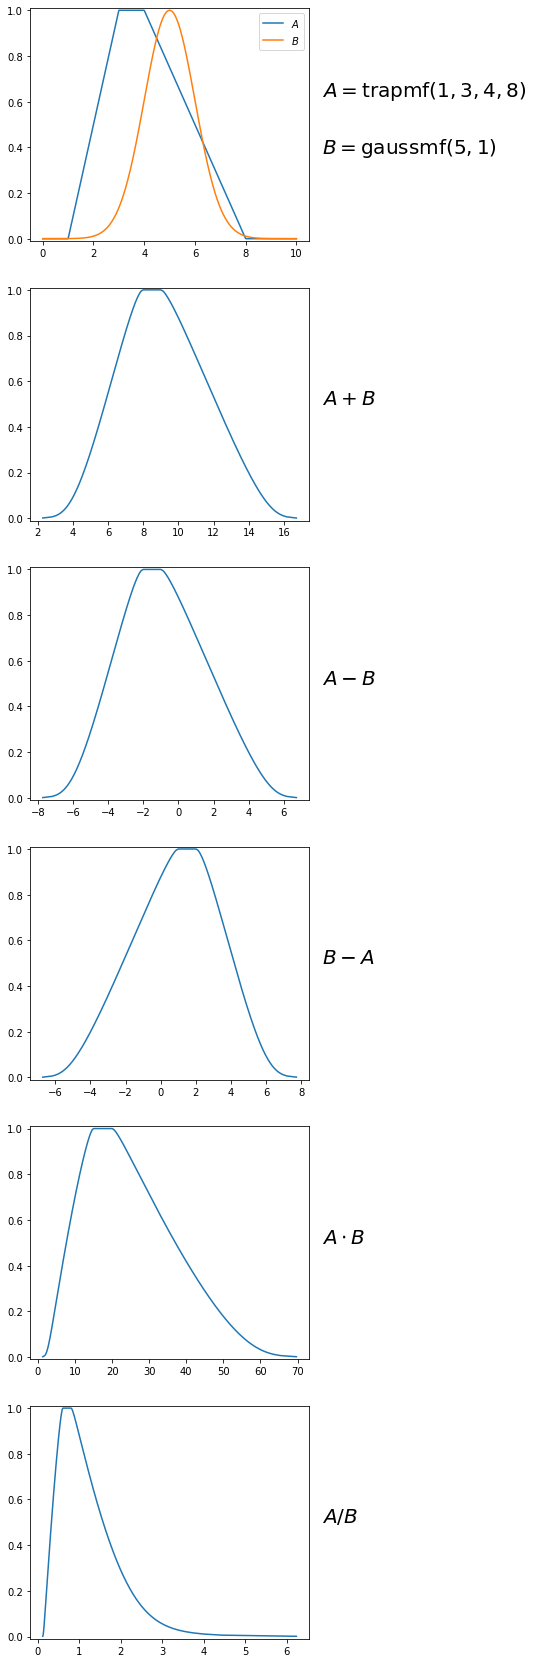

In [8]:
def fuzzy_ope(cutsA, cutsB, ope):
    tmp = {}
    for y in np.linspace(0.001, 1, 200):
        a = cutsA[0](y)
        b = cutsA[1](y)
        d = cutsB[0](y)
        e = cutsB[1](y)
        tmp[min(ope(a,d),ope(a,e),ope(b,d),ope(b,e))] = y
        tmp[max(ope(a,d),ope(a,e),ope(b,d),ope(b,e))] = y
    sorter = np.argsort(list(tmp.keys()))
    X = np.array(list(tmp.keys()))[sorter]
    Y = np.array(list(tmp.values()))[sorter]
    return X, Y
        
cutsA = [lambda y: 1+2*y, lambda y: 8-4*y]
cutsB = [lambda y: 5-math.sqrt(-2*math.log(y)), lambda y: 5+math.sqrt(-2*math.log(y))]

addX, addY = fuzzy_ope(cutsA, cutsB, np.add)
subX, subY = fuzzy_ope(cutsA, cutsB, np.subtract)
sub2X, sub2Y = fuzzy_ope(cutsB, cutsA, np.subtract)
multX, multY = fuzzy_ope(cutsA, cutsB, np.multiply)
divX, divY = fuzzy_ope(cutsA, cutsB, np.divide)

fuzzyGraphsText([
    (X, [(A,'$A$'), (B,'$B$')], [r'$A = \mathrm{trapmf}(1,3,4,8)$', r'$B = \mathrm{gaussmf}(5,1)$']),
    (addX, addY, '$A + B$'),
    (subX, subY, '$A - B$'),
    (sub2X, sub2Y, '$B - A$'),
    (multX, multY, '$A \cdot B$'),
    (divX, divY, '$A / B$'),
])
plt.show()

### Klir Textbook - Execice 4.1

$A(x) = \begin{cases} \sin(x) & x \in [0,\pi] \\ 0 & \text{otherwise} \end{cases}$

$A$ is a fuzzy number. Indeed, the function sinus is strictly increasing on $[0,\pi/2]$, and strictly decreasing on $[\pi/2,\pi]$, while reaching 1 at $\pi/2$.

$B(x) = \begin{cases} x & x \in [0,1] \\ 0 & \text{otherwise} \end{cases}$

$B$ is also a fuzzy number. It is strictly increasing on $[0,1]$, while reaching 1 at 1. We can assimiliate its right part as a real number, which are also considered fuzzy number.

$C(x) = \begin{cases} 1 & x \in [0,10] \\ 0 & \text{otherwise} \end{cases}$

$C$ can be considered a fuzzy number. It is actually a regular interval, which are fuzzy numbers.

$D(x) = \begin{cases} \min(1,x) & x \ge 0 \\ 0 & x \lt 0 \end{cases}$

I don't think that $D$ is a fuzzy number. The right part of the fuzzy set $D$ never reaches 0, effectively breaking the rule of fuzzy number.

$E(x) = \begin{cases} 1 & x = 5 \\ 0 & \text{otherwise} \end{cases}$

$E$ is a regular number, so by extension it also is a fuzzy number.

### Klir Textbook - Exercice 4.2

$[-1, 2] + [1, 3] = [0, 5]$

$[-2, 4] - [3, 6] = [-8, 1]$

$[-3. 4] \cdot [-3, 4] = [\min(-3\times-3, -3\times 4, 4\times 4),\max(-3\times-3, -3\times 4, 4\times 4)] = [-12, 16]$

$[-4, 6] / [1, 2] = \left[\min\left(\frac{-4}{1},\frac{-4}{2},\frac{6}{1},\frac{6}{2}\right),\max\left(\frac{-4}{1},\frac{-4}{2},\frac{6}{1},\frac{6}{2}\right)\right] = [-4, 6]$

### Klir Textbook - Exercice 4.5

$$
\begin{matrix}
    A(x) = \begin{cases} \frac{2+x}{2} & -2 \lt x \le 0 \\ \frac{2-x}{2} & 0 \lt x \lt 2 \\ 0 & \mathrm{otherwise} \end{cases} &
    B(x) = \begin{cases} \frac{x-2}{2} &  2 \lt x \le 4 \\ \frac{6-x}{2} & 4 \lt x \lt 6 \\ 0 & \mathrm{otherwise} \end{cases} \\ \\
    ^\alpha A = [2\alpha-2, 2-2\alpha] &
    ^\alpha B = [2+2\alpha, 6-2\alpha]
\end{matrix}
$$

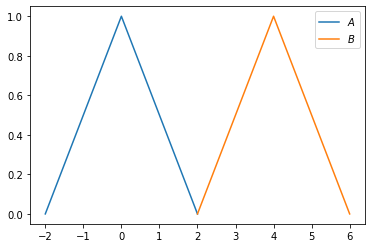

In [9]:
alphaRange = np.linspace(0,1,20)

AX = np.linspace(-2,2,101)
AY = [1+(x if x < 0 else -x)/2 for x in AX]
Acut = [lambda a:2*a-2,lambda a:2-2*a]
BX = np.linspace(2,6,101)
BY = [(x-2 if x <= 4 else 6-x)/2 for x in BX]
Bcut = [lambda a:2*a+2,lambda a:6-2*a]

plt.plot(AX, AY, label='$A$')
plt.plot(BX, BY, label='$B$')
plt.legend()
plt.show()

$$ \begin{matrix}
    ^\alpha (A+B) = [4\alpha, 8-4\alpha]   & \qquad &   ^\alpha (A-B) = [4\alpha-8, -4\alpha]   \\ \\
%
    \begin{matrix}
        x = 4\alpha     &    x = 8-4\alpha  \\
        \alpha = x/4    &   \alpha = (8-x)/4
    \end{matrix} & &
    \begin{matrix}
        x = 4\alpha-8   &   x = -4\alpha    \\
        \alpha = (x+8)/4    &   \alpha = -x/4
    \end{matrix} \\ \\
%
    (A+B)(x) = \begin{cases}
        \frac{x}{4}     & x \in [0,4] \\
        2-\frac{x}{4}   & x \in [4,8] \\
        0 & \mathrm{otherwise}
    \end{cases} & &
    (A-B)(x) = \begin{cases}
        2+\frac{x}{4}   & x \in [-8,-4] \\
        -\frac{x}{4}    & x \in [-4,0] \\
        0 & \mathrm{otherwise}
    \end{cases}
\end{matrix} $$
<br>

$$^\alpha (B-A) = [4\alpha, 8-4\alpha] =\ ^\alpha (A+B) \\ (B-A)(x) = (A+B)(x)$$


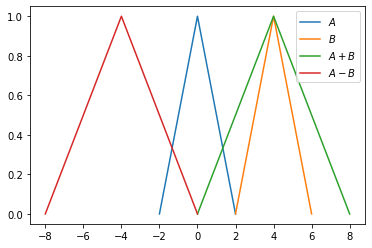

In [10]:
plt.plot(AX,AY,label='$A$')
plt.plot(BX,BY,label='$B$')
plt.plot(np.linspace(0,8,101), [x/4 if x < 4 else 2-x/4 for x in np.linspace(0,8,101)], label='$A+B$')
plt.plot(np.linspace(-8,0,101), [-x/4 if x > -4 else 2+x/4 for x in np.linspace(-8,0,101)], label='$A-B$')
plt.legend()
plt.show()

$$ ^\alpha (A \cdot B) = [(2\alpha-2)(6-2\alpha), (2-2\alpha)(6-2\alpha)] $$

$$\begin{matrix}
    x           &=& (2\alpha-2)(6-2\alpha)              &\quad& x           &=& (2-2\alpha)(6-2\alpha) \\
                &=& -4\alpha^2 + 12\alpha + 4\alpha -12 &     &             &=& 4\alpha^2 - 4\alpha - 12\alpha + 12 \\
                &=& -(4\alpha^2 - 16\alpha + 16) + 4    &     &             &=& (4\alpha^2 - 16\alpha + 16) - 4 \\
    4-x         &=& (2\alpha - 4)^2                     &     & 4+x         &=& (2\alpha - 4)^2 \\
    -\sqrt{4-x} &=& 2\alpha - 4                         &     & -\sqrt{4+x} &=& 2\alpha - 4 \\
    \alpha      &=& \frac{4-\sqrt{4-x}}{2}              &     & \alpha      &=& \frac{4-\sqrt{4+x}}{2}
\end{matrix}$$
*Note: We have to take the negative square root for keeping the equality on both cases*

$$ (A \cdot B)(x) = \begin{cases}
    \frac{4-\sqrt{4-x}}{2} & x \in [-12,0] \\
    \frac{4-\sqrt{4+x}}{2} & x \in [0,12] \\
    0                      & \mathrm{otherwise}
\end{cases} $$


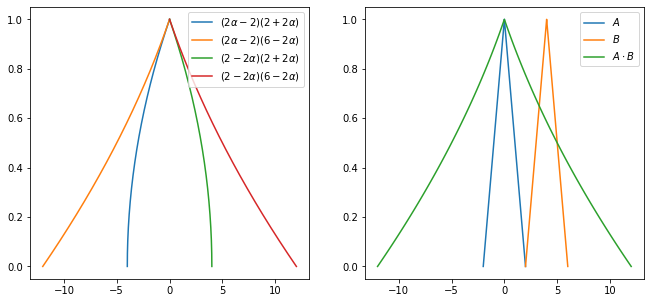

In [11]:
fig, axs = plt.subplots(1,2,figsize=(11,5))
axs[0].plot([(2*a-2)*(2+2*a) for a in alphaRange], alphaRange, label=r'$(2\alpha-2)(2+2\alpha)$')
axs[0].plot([(2*a-2)*(6-2*a) for a in alphaRange], alphaRange, label=r'$(2\alpha-2)(6-2\alpha)$')
axs[0].plot([(2-2*a)*(2+2*a) for a in alphaRange], alphaRange, label=r'$(2-2\alpha)(2+2\alpha)$')
axs[0].plot([(2-2*a)*(6-2*a) for a in alphaRange], alphaRange, label=r'$(2-2\alpha)(6-2\alpha)$')
axs[0].legend()
axs[1].plot(AX,AY,label='$A$')
axs[1].plot(BX,BY,label='$B$')
axs[1].plot(np.linspace(-12,12,101), [(4-math.sqrt(4+(x if x > 0 else -x)))/2 for x in np.linspace(-12,12,101)], label='$A \cdot B$')
axs[1].legend()
plt.show()

$$ ^\alpha (A / B) = \left[\frac{2\alpha-2}{2\alpha+2}, \frac{2-2\alpha}{2+2\alpha}\right] $$

$$\begin{matrix}
    x                    &=& \frac{2\alpha-2}{2\alpha+2} &\quad& x                    &=& \frac{2-2\alpha}{2+2\alpha} \\
    2{\alpha}x + 2x      &=& 2\alpha - 2                 &     & 2x + 2{\alpha}x      &=& 2 - 2\alpha \\
    2\alpha - 2{\alpha}x &=& 2x + 2                      &     & 2{\alpha}x + 2\alpha &=& 2 - 2x \\
    \alpha(2 - 2x)       &=& 2 + 2x                      &     & \alpha(2 + 2x)       &=& 2 - 2x \\
    \alpha               &=& \frac{2 + 2x}{2 - 2x}       &     & \alpha               &=& \frac{2 - 2x}{2 + 2x}
\end{matrix}$$

$$ (A / B)(x) = \begin{cases}
    \frac{2+2x}{2-2x} & x \in [-1,0] \\
    \frac{2-2x}{2+2x} & x \in [0,1] \\
    0                 & \mathrm{otherwise}
\end{cases} $$

<!--
    y(2+2x) = 2-2x
    y = (2-2x)/(2+2x)
-->

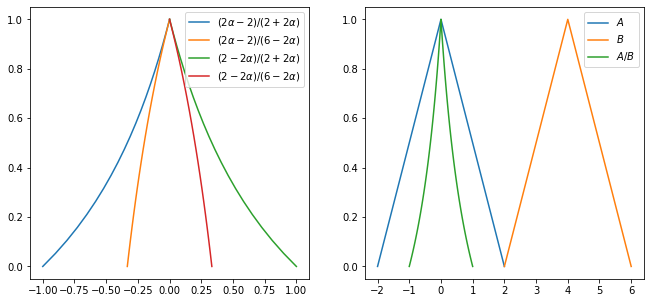

In [12]:
fig, axs = plt.subplots(1,2,figsize=(11,5))
axs[0].plot([(2*a-2)/(2+2*a) for a in alphaRange], alphaRange, label=r'$(2\alpha-2)/(2+2\alpha)$')
axs[0].plot([(2*a-2)/(6-2*a) for a in alphaRange], alphaRange, label=r'$(2\alpha-2)/(6-2\alpha)$')
axs[0].plot([(2-2*a)/(2+2*a) for a in alphaRange], alphaRange, label=r'$(2-2\alpha)/(2+2\alpha)$')
axs[0].plot([(2-2*a)/(6-2*a) for a in alphaRange], alphaRange, label=r'$(2-2\alpha)/(6-2\alpha)$')
axs[0].legend()
axs[1].plot(AX,AY,label='$A$')
axs[1].plot(BX,BY,label='$B$')
axs[1].plot(np.linspace(-1,1,101), [(2+2*x)/(2-2*x) if x < 0 else (2-2*x)/(2+2*x) for x in np.linspace(-1,1,101)], label='$A / B$')
axs[1].legend()
plt.show()

$$ \begin{matrix}
    ^\alpha \mathrm{MIN}(A,B) = [2\alpha-2,2-2\alpha] =\ ^\alpha A  & & ^\alpha \mathrm{MAX}(A,B) = [2+2\alpha,6-2\alpha] =\ ^\alpha B \\ \\
%
    (\mathrm{MIN}(A,B))(x) = A(x) & &
    (\mathrm{MAX}(A,B))(x) = B(x)
\end{matrix} $$



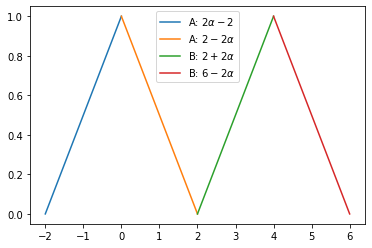

In [13]:
plt.plot([(2*a-2) for a in alphaRange], alphaRange, label=r'A: $2\alpha-2$')
plt.plot([(2-2*a) for a in alphaRange], alphaRange, label=r'A: $2-2\alpha$')
plt.plot([(2+2*a) for a in alphaRange], alphaRange, label=r'B: $2+2\alpha$')
plt.plot([(6-2*a) for a in alphaRange], alphaRange, label=r'B: $6-2\alpha$')
plt.legend()
plt.show()